# Apple App Data

## 1. Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Loading, Exploration and Cleaning
↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv('./data/appleAppData.csv')

- Viewing first five rows of data

In [3]:
df.head(5)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


> **Note**: The notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
# pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [7]:
# we have to work on following column
# 1- Content Rating - change d-type to float/int
# 2- Required_IOS_Version - change d-type to float
# 3- Version - change d-type to float

- Let's have a look on the shape of the dataset

In [8]:
df.shape

(1230376, 21)

In [9]:
df.isnull().sum()

App_Id                          0
App_Name                        1
AppStore_Url                    0
Primary_Genre                   0
Content_Rating                  0
Size_Bytes                    224
Required_IOS_Version            0
Released                        3
Updated                         0
Version                         0
Price                         490
Currency                        0
Free                            0
DeveloperId                     0
Developer                       0
Developer_Url                1109
Developer_Website          643988
Average_User_Rating             0
Reviews                         0
Current_Version_Score           0
Current_Version_Reviews         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

# **Observations**
---
1. There are 1230376 rows and 21 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   'App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
   'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
   'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
   'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
   'Current_Version_Score', 'Current_Version_Reviews' 
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - 'Content_Rating', 'Required_IOS_Version', 'Version'` 

In [11]:
df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


## Observations:
---
- We have only 7 columns as numeric data type, rest all are object data type (according to python), but we can see that 'Content_Rating', 'Required_IOS_Version', 'Version' are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the 'Content_Rating' column first

In [12]:
# Check for null values
df['Content_Rating'].isnull().sum()

0

In [13]:
# find how many values has '+' in it
df['Content_Rating'].loc[df['Content_Rating'].str.contains('\+')].value_counts().sum()

1230366

In [14]:
# Total values in Content_Rating column
df['Content_Rating'].value_counts().sum()

1230376

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

In [15]:
# remove the plus sign from install column and convert it to numeric
# df['Content_Rating'] = df['Content_Rating'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [16]:
df['Content_Rating'] = df['Content_Rating'].apply(lambda x: x.replace('Not yet rated', 'Everyone') if 'Not yet rated' in str(x) else x)

In [17]:
# Replace empty strings with NaN
df['Content_Rating'] = df['Content_Rating'].replace(' ', np.nan)

# Drop rows with NaN values in 'Content_Rating' column
df = df.dropna(subset=['Content_Rating'])

In [18]:
df['Content_Rating'].tail(10)

1230366    17+
1230367     4+
1230368     4+
1230369     4+
1230370     4+
1230371     4+
1230372     4+
1230373     4+
1230374     4+
1230375     4+
Name: Content_Rating, dtype: object

In [19]:
df['Content_Rating'].dtype

dtype('O')

In [20]:
df['Content_Rating'].unique()

array(['4+', '17+', '9+', '12+', 'Everyone'], dtype=object)

In [21]:
df["Content_Rating"]=df["Content_Rating"].replace("4+","todlers")
df["Content_Rating"]=df["Content_Rating"].replace("9+","Children")
df["Content_Rating"]=df["Content_Rating"].replace("12+","Teens")
df["Content_Rating"]=df["Content_Rating"].replace("17+","Adults")
df["Content_Rating"]=df["Content_Rating"].replace("Everyone","Everyone")

In [22]:
df['Content_Rating'].sort_values(ascending=True)

681126      Adults
590654      Adults
747601      Adults
841843      Adults
1127247     Adults
            ...   
446148     todlers
446149     todlers
446151     todlers
446133     todlers
1230375    todlers
Name: Content_Rating, Length: 1230376, dtype: object

- Let's clean the 'Required_IOS_Version' column now

In [23]:
# Check for null values
df['Required_IOS_Version'].isnull().sum()

0

In [24]:
df['Required_IOS_Version'].sort_values(ascending=False)

694497     9.9
555679     9.6
790512     9.6
374476     9.5
1038666    9.5
          ... 
1136536     10
585590      10
1017725     10
949524      10
1072613     10
Name: Required_IOS_Version, Length: 1230376, dtype: object

In [25]:
df['Required_IOS_Version'] = df['Required_IOS_Version'].apply(lambda x: x.replace('.', '') if '.' in str(x) else x)

In [26]:
df['Required_IOS_Version'] = df['Required_IOS_Version'].apply(lambda x: int(x))

In [27]:
df['Required_IOS_Version'].dtype

dtype('int64')

In [28]:
df['Required_IOS_Version'].info

<bound method Series.info of 0           80
1          100
2           90
3           80
4           90
          ... 
1230371    130
1230372     90
1230373     90
1230374    100
1230375     80
Name: Required_IOS_Version, Length: 1230376, dtype: int64>

- Let's clean the 'Version' column 

In [29]:
# Check for null values
df['Version'].isnull().sum()

0

In [30]:
df['Version'].tail(10)

1230366     1.0.1
1230367     1.1.2
1230368    2.0.16
1230369       1.6
1230370      1.08
1230371     1.0.1
1230372       1.1
1230373       1.0
1230374     1.2.5
1230375       1.9
Name: Version, dtype: object

In [31]:
df['Version'].sort_values(ascending=False)

922147                                       電カル
1193816                                    版本4.5
1184923                                      版本4
953315                                 版本2.1.184
264184                                       無料版
                           ...                  
400147                                   (3.2.0)
871580                                (14) 1.0.7
1057452                                   (1.2)2
244155                                     '1.1'
704900     # 2.41.2#255 - Fix Garmin Integration
Name: Version, Length: 1230376, dtype: object

In [32]:
df['Version'].unique()

array(['1.1.2', '1.3', '1.3.1', ..., '1.40.0.1', '10.2a.0001',
       '2.2021.09'], dtype=object)

In [33]:
df['Version'] = df['Version'].str.extract('(\d+\.?\d*)', expand=False)

In [34]:
df['Version'] = df['Version'].apply(lambda x: x.replace('.', '') if '.' in str(x) else x)

In [35]:
df['Version'] = df['Version'].fillna(0)

In [36]:
df['Version'] = df['Version'].apply(lambda x: float(x))

In [37]:
df['Version'].dtype

dtype('float64')

In [38]:
df.isnull().sum().sort_values(ascending=False)

Developer_Website          643988
Developer_Url                1109
Price                         490
Size_Bytes                    224
Released                        3
App_Name                        1
Free                            0
Current_Version_Score           0
Reviews                         0
Average_User_Rating             0
Developer                       0
DeveloperId                     0
App_Id                          0
Currency                        0
Version                         0
Updated                         0
Required_IOS_Version            0
Content_Rating                  0
Primary_Genre                   0
AppStore_Url                    0
Current_Version_Reviews         0
dtype: int64

### **2.1. Descriptive Statistics**

In [39]:
df.describe()

,Size_Bytes,Required_IOS_Version,Version,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.230376e+06,1.230376e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,1.203503e+02,1.228176e+13,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,3.103820e+02,1.352299e+16,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,5.000000e+00,0.000000e+00,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,9.000000e+01,1.000000e+01,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,1.000000e+02,1.300000e+01,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,1.100000e+02,3.100000e+01,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,1.419900e+04,1.500000e+19,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


In [40]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Developer_Website          52.340748
Developer_Url               0.090135
Price                       0.039825
Size_Bytes                  0.018206
Released                    0.000244
App_Name                    0.000081
Free                        0.000000
Current_Version_Score       0.000000
Reviews                     0.000000
Average_User_Rating         0.000000
Developer                   0.000000
DeveloperId                 0.000000
App_Id                      0.000000
Currency                    0.000000
Version                     0.000000
Updated                     0.000000
Required_IOS_Version        0.000000
Content_Rating              0.000000
Primary_Genre               0.000000
AppStore_Url                0.000000
Current_Version_Reviews     0.000000
dtype: float64

In [41]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

<Axes: >

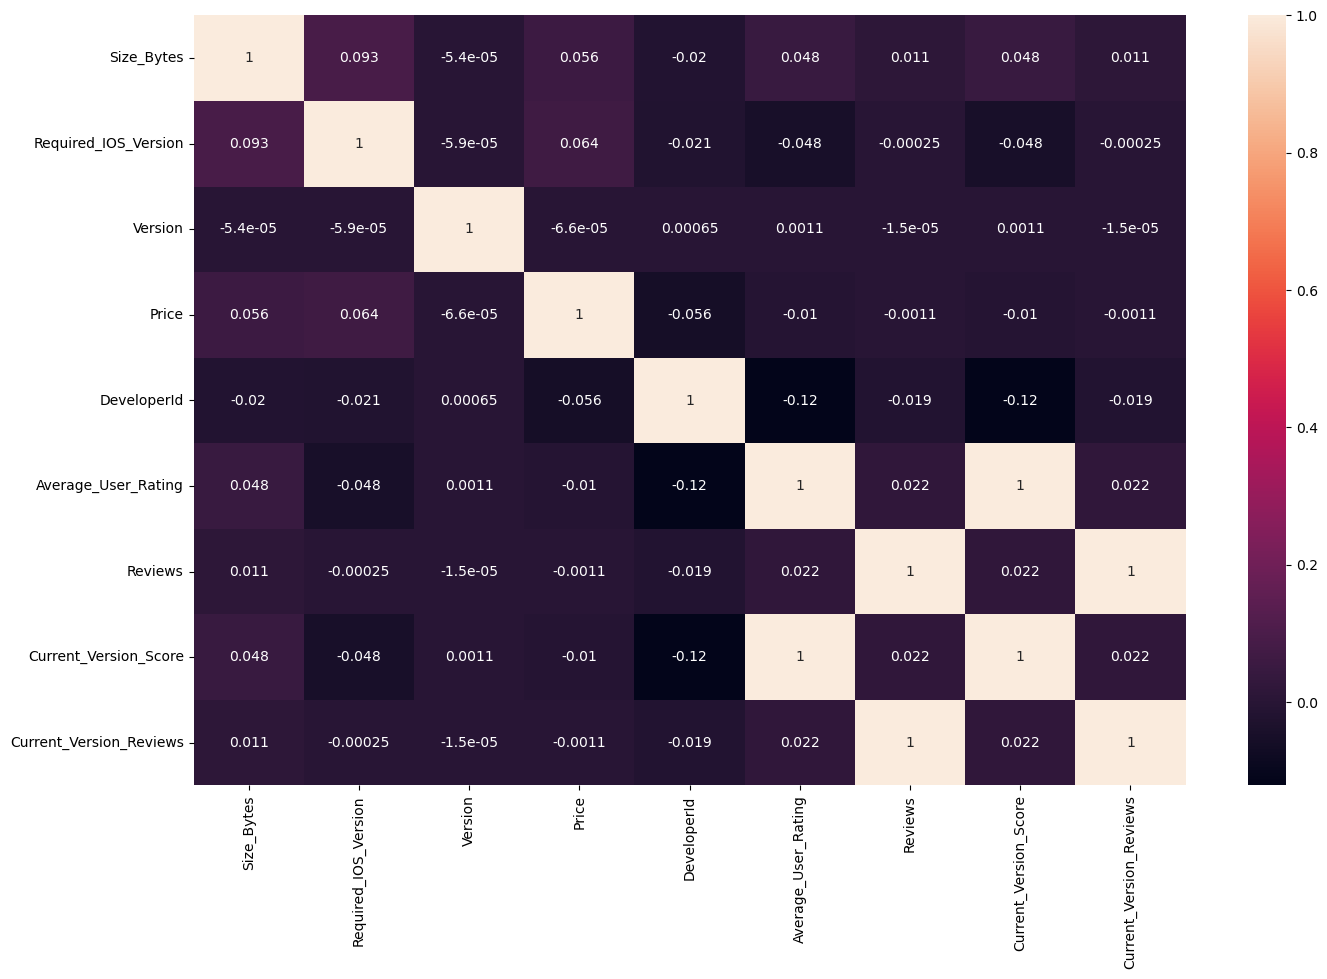

In [42]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Size_Bytes','Required_IOS_Version','Version','Price','DeveloperId','Average_User_Rating', 'Reviews','Current_Version_Score', 'Current_Version_Reviews'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [43]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Size_Bytes,Required_IOS_Version,Version,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
Size_Bytes,1.000000,0.093314,-0.000054,0.056338,-0.019631,0.048478,0.011250,0.048478,0.011250
Required_IOS_Version,0.093314,1.000000,-0.000059,0.064214,-0.021321,-0.047998,-0.000254,-0.047998,-0.000254
Version,-0.000054,-0.000059,1.000000,-0.000066,0.000649,0.001131,-0.000015,0.001131,-0.000015
Price,0.056338,0.064214,-0.000066,1.000000,-0.055526,-0.010444,-0.001088,-0.010444,-0.001088
DeveloperId,-0.019631,-0.021321,0.000649,-0.055526,1.000000,-0.121160,-0.018661,-0.121160,-0.018661
Average_User_Rating,0.048478,-0.047998,0.001131,-0.010444,-0.121160,1.000000,0.022167,1.000000,0.022167
Reviews,0.011250,-0.000254,-0.000015,-0.001088,-0.018661,0.022167,1.000000,0.022167,1.000000
Current_Version_Score,0.048478,-0.047998,0.001131,-0.010444,-0.121160,1.000000,0.022167,1.000000,0.022167
Current_Version_Reviews,0.011250,-0.000254,-0.000015,-0.001088,-0.018661,0.022167,1.000000,0.022167,1.000000


In [44]:
df['Price'].mean()

0.5041263824452021

In [45]:
df['Price'].median()

0.0

In [46]:
df['Price'].mode()

0    0.0
Name: Price, dtype: float64

In [47]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [48]:
# remove the rows having null values in the 'Developer_Url', 'Size_Bytes', 'Released' and  'App_name'
df.dropna(subset=['Developer_Url', 'Size_Bytes', 'Released', 'App_Name'], inplace=True)

In [49]:
df['Developer_Website'].tail()

1230371                          NaN
1230372      https://securexvpn.com/
1230373    http://bee-labs.github.io
1230374         https://aisoftech.vn
1230375                          NaN
Name: Developer_Website, dtype: object

In [50]:
df['Developer_Website'].fillna('No Website Available', inplace=True)

In [51]:
df['Developer_Website'].isnull().sum()

0

In [52]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

App_Id                     0
Currency                   0
Current_Version_Score      0
Reviews                    0
Average_User_Rating        0
Developer_Website          0
Developer_Url              0
Developer                  0
DeveloperId                0
Free                       0
Price                      0
App_Name                   0
Version                    0
Updated                    0
Released                   0
Required_IOS_Version       0
Size_Bytes                 0
Content_Rating             0
Primary_Genre              0
AppStore_Url               0
Current_Version_Reviews    0
dtype: int64

> Next, Find duplications and Analyse them if its a valid DUPLICATION

In [53]:
df.duplicated().any()

False

In [54]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [55]:
any_duplicates = df.duplicated(subset=['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews']).any()

In [56]:
duplicate = df['App_Name'].duplicated().any()
duplicate

True

In [57]:
df['App_Name'].value_counts().sort_values(ascending=False)

App_Name
Vanguard              6
Bloom                 5
Linker                5
E-Smart               4
Event Manager         4
                     ..
TwoFactor             1
TWOTOO                1
TwoWayStreaming       1
TWSpeed Telecom       1
Sổ Điểm Thông Minh    1
Name: count, Length: 1222195, dtype: int64

In [58]:
df[df['App_Name'] == 'Vanguard']

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
478488,com.vanguard.app,Vanguard,https://apps.apple.com/us/app/vanguard/id33518...,Finance,todlers,160800768.0,100,2009-10-24T19:14:54Z,2021-08-26T19:55:20Z,1114.0,0.0,USD,True,335186212,"The Vanguard Group, Inc.",https://apps.apple.com/us/developer/the-vangua...,http://www.vanguard.com,4.73977,167472,4.73977,167472
624553,com.omr.vngu,Vanguard,https://apps.apple.com/us/app/vanguard/id15822...,Games,todlers,191240192.0,100,2021-08-27T07:00:00Z,2021-08-27T12:16:53Z,10.0,0.0,USD,True,1582197355,omar naser,https://apps.apple.com/us/developer/omar-naser...,No Website Available,3.00000,2,3.00000,2
871735,br.com.vanguardhome,Vanguard,https://apps.apple.com/us/app/vanguard/id14660...,Lifestyle,todlers,87821312.0,90,2020-03-25T07:00:00Z,2021-10-05T23:12:01Z,11.0,0.0,USD,True,1459748843,Vanguard Home Empreendimentos Imobiliarios LTDA,https://apps.apple.com/us/developer/vanguard-h...,No Website Available,0.00000,0,0.00000,0
1024185,com.proptex.vanguard.barcelona,Vanguard,https://apps.apple.com/us/app/vanguard/id15690...,Productivity,Adults,35228672.0,130,2021-06-11T07:00:00Z,2021-09-05T08:02:33Z,10.0,0.0,USD,True,1569057203,3k CO-LIVING $ ACCOMODATION,https://apps.apple.com/us/developer/3k-co-livi...,https://vanguard-student-housing.com,0.00000,0,0.00000,0
1066082,com.partnernogueiraalliance1.Vanguard1,Vanguard,https://apps.apple.com/us/app/vanguard/id14412...,Reference,todlers,24201216.0,120,2018-11-13T01:31:37Z,2021-03-24T12:38:41Z,11.0,0.0,USD,True,1441217235,TONANDEL PTY LTD,https://apps.apple.com/us/developer/tonandel-p...,http://vanguardmalvern.com.au/,0.00000,0,0.00000,0
1094792,com.justbrands.highstreet.vanguard.ipad,Vanguard,https://apps.apple.com/us/app/vanguard/id91943...,Shopping,todlers,68751360.0,130,2014-09-28T16:38:41Z,2021-07-26T09:36:18Z,2114.0,0.0,USD,True,849091402,Just Brands B.V.,https://apps.apple.com/us/developer/just-brand...,No Website Available,5.00000,1,5.00000,1


### 5.5 Adding column to hold Size_Bytes in MBs

In [59]:
df['Size_MB'] = 0

In [60]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews', 'Size_MB'],
      dtype='object')

In [61]:
df['Size_MB'] = df['Size_Bytes'].apply(lambda x: (float(x)/1024)/1024)

In [62]:
df['Size_MB']

0          20.974609
1          12.527344
2          20.926758
3          78.059570
4          61.695312
             ...    
1230371    15.894531
1230372    37.208984
1230373    16.425781
1230374    54.088867
1230375    81.191406
Name: Size_MB, Length: 1229042, dtype: float64

In [63]:
df = df.rename(columns={'Free': 'Type'})

In [64]:
df['Type']

0           True
1           True
2           True
3          False
4           True
           ...  
1230371     True
1230372     True
1230373     True
1230374     True
1230375     True
Name: Type, Length: 1229042, dtype: bool

In [65]:
df['Type'] = df['Type'].map({True: 'Paid', False: 'Free'})

In [66]:
df['Type']

0          Paid
1          Paid
2          Paid
3          Free
4          Paid
           ... 
1230371    Paid
1230372    Paid
1230373    Paid
1230374    Paid
1230375    Paid
Name: Type, Length: 1229042, dtype: object

In [67]:
df['Type'].unique()

array(['Paid', 'Free'], dtype=object)

Q1. What are the top 10 categories with the most downloads from the Apple Store?\


In [68]:
# Group the DataFrame by 'Primary_Genre' and calculate the sum of 'Reviews'
genre_reviews = df.groupby('Primary_Genre')['Reviews'].sum().reset_index()

# Sort the result in descending order and get the top 10 categories
top_10_genres = genre_reviews.sort_values(by='Reviews', ascending=False).head(10)

print(top_10_genres)

    Primary_Genre    Reviews
7           Games  258132076
5         Finance   90502569
16  Photo & Video   76755388
19       Shopping   74139188
6    Food & Drink   57857701
23         Travel   52974285
13          Music   51714064
4   Entertainment   50535615
10      Lifestyle   38850227
24      Utilities   34412463


A1: Gaming apps are the most downloaded apps from the store.

Q2. What are the top 10 primary genres with the highest average user rating?\

Q3. Which primary genre has the highest count of paid and free apps?\

Q4. What are the top 5 paid apps with the highest ratings?\

Q5. What are the top 5 free apps with the highest ratings?\

Q6. What are the apps with the highest content rating?\

Q7. In which years were the most apps released?\

Q8. How does the size of an app in MBs compare to its price?\

Q9. Who are the top 10 app-producing developers?\

Q10. What types of genres attract which types of clients in terms of revenue?\

Q11. How do app releases per content rating compare year on year?\

Q12. How does user rating compare to price?\

Q13. How does user rating compare to MB size?\

Q14. How do YoY breakdowns per genre based on app price compare?\

Q16. Interdependency of numeric attributes on each other\


Q2. What are the top 10 primary genres with the highest average user rating?

In [69]:
import pandas as pd

# Group the DataFrame by 'Primary_Genre' and calculate the average of 'Average_User_Rating'
genre_ratings = df.groupby('Primary_Genre')['Average_User_Rating'].mean().reset_index()

# Sort the result in descending order and get the top 10 genres
top_10_genres = genre_ratings.sort_values(by='Average_User_Rating', ascending=False).head(10)

print(top_10_genres)

        Primary_Genre  Average_User_Rating
25            Weather             2.594274
7               Games             2.554464
16      Photo & Video             2.305483
13              Music             2.253552
0                Book             2.182689
18          Reference             2.180691
5             Finance             2.110937
4       Entertainment             2.021176
20  Social Networking             1.994262
9    Health & Fitness             1.848775


A2- The to 10 primary genre with high average user ratings are Weather,Games,Photo & Video, Music,Book,Reference, Finance,Entertainment,Social Networking & Health & Fitness.    

Q3. Which primary genre has the highest count of paid and free apps?

In [70]:
import pandas as pd

# Group the DataFrame by 'Primary_Genre' and 'Type', and calculate the count of apps
genre_type_counts = df.groupby(['Primary_Genre', 'Type']).size().reset_index(name='Count')

# Pivot the result to get the count of paid and free apps for each genre
genre_type_pivot = genre_type_counts.pivot(index='Primary_Genre', columns='Type', values='Count')

# Get the genre with the highest count of paid and free apps
max_paid_genre = genre_type_pivot['Paid'].idxmax()
max_free_genre = genre_type_pivot['Free'].idxmax()

print(f"The primary genre with the highest count of paid apps is: {max_paid_genre}")
print(f"The primary genre with the highest count of free apps is: {max_free_genre}")

The primary genre with the highest count of paid apps is: Games
The primary genre with the highest count of free apps is: Education


Q4. What are the top 5 paid apps with the highest ratings?\

In [71]:
import pandas as pd

# Filter the DataFrame to only include paid apps
paid_apps = df[df['Type'] == 'Paid']

# Sort the paid apps by 'Average_User_Rating' in descending order
paid_apps_sorted = paid_apps.sort_values(by='Average_User_Rating', ascending=False)

# Get the top 5 paid apps with the highest ratings
top_5_paid_apps = paid_apps_sorted.head(5)

# Select the relevant columns to display
top_5_paid_apps = top_5_paid_apps[['App_Name', 'Primary_Genre', 'Average_User_Rating', 'Price']]

print(top_5_paid_apps)

                              App_Name Primary_Genre  Average_User_Rating  \
403942   Rise of Zombie - City Defense         Games                  5.0   
557541         Business Banking Mobile       Finance                  5.0   
1113785                       TrackGTS  Productivity                  5.0   
918559                         VisiMed       Medical                  5.0   
918560                    Visio Agenda       Medical                  5.0   

         Price  
403942     0.0  
557541     0.0  
1113785    0.0  
918559     0.0  
918560     0.0  


A4- The top 5 paid apps with highest rating are Rise of Zombie - City Defense,Business Banking Mobile, TrackGTS,  VisiMed,Visio Agenda 

Q5. What are the top 5 free apps with the highest ratings?

In [72]:
import pandas as pd

# Filter the DataFrame to only include free apps
free_apps = df[df['Type'] == 'Free']

# Sort the free apps by 'Average_User_Rating' in descending order
free_apps_sorted = free_apps.sort_values(by='Average_User_Rating', ascending=False)

# Get the top 5 free apps with the highest ratings
top_5_free_apps = free_apps_sorted.head(5)

# Select the relevant columns to display
top_5_free_apps = top_5_free_apps[['App_Name', 'Primary_Genre', 'Average_User_Rating']]

print(top_5_free_apps)

                    App_Name Primary_Genre  Average_User_Rating
1055350    Elements Stickers      Stickers                  5.0
492324   UK Health Reference       Medical                  5.0
104888      AbcTiger Phonics     Education                  5.0
104890           ABCya Bingo     Education                  5.0
219843         Match-Up Math     Education                  5.0


A5- The to 5 free apps with highest rating are Elements Stickers, UK Health Reference,AbcTiger Phonics, ABCya Bingo, Match-Up Math

Q6. What are the apps with the highest content rating?

In [73]:
import pandas as pd

# Sort the DataFrame by 'Content_Rating' in descending order
df_sorted = df.sort_values(by='Content_Rating', ascending=False)

# Get the top apps with the highest content rating
top_content_rating_apps = df_sorted.head(10)

# Select the relevant columns to display
top_content_rating_apps = top_content_rating_apps[['App_Name', 'Primary_Genre', 'Content_Rating']]

print(top_content_rating_apps)

                         App_Name     Primary_Genre Content_Rating
0                  A+ Paper Guide         Education        todlers
784576             CrossFlow Yoga  Health & Fitness        todlers
784578                  CrossHero  Health & Fitness        todlers
784580                CrossKeeper  Health & Fitness        todlers
784581    CrossKompagniet Randers  Health & Fitness        todlers
784582             Crossout Timer            Sports        todlers
784583     Crossover Dance Studio  Health & Fitness        todlers
784584         Crossover Passport  Health & Fitness        todlers
784585  Crossover: Basketball App  Health & Fitness        todlers
784586         Crossroads Hospice           Medical        todlers


A6- The apps with the highest content rating A+ Paper Guide, CrossFlow Yoga, CrossHero, CrossKeeper & CrossKompagniet Randers.

Q7. In which years were the most apps released?

In [74]:
import pandas as pd

# Extract the release year from the 'Release_Date' column
df['Release_Year'] = pd.to_datetime(df['Released']).dt.year

# Count the number of apps released in each year
release_year_counts = df['Release_Year'].value_counts()

# Sort the result in descending order
release_year_counts = release_year_counts.sort_values(ascending=False)

# Print the top 5 years with the most app releases
print(release_year_counts.head(5))

Release_Year
2020    227581
2021    217747
2019    165617
2018    134744
2017    126285
Name: count, dtype: int64


A7- The most apps released in year 2020

Q8. How does the size of an app in MBs compare to its price?

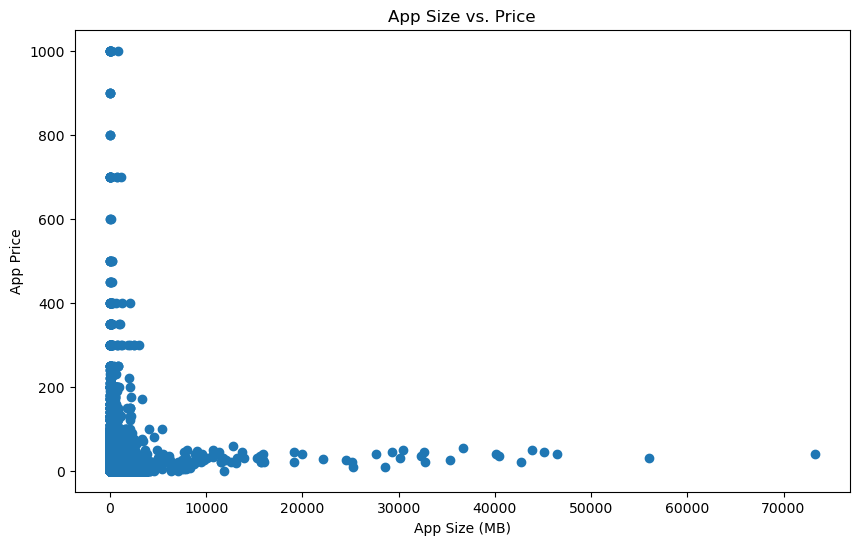

In [75]:
import matplotlib.pyplot as plt

# Ensure the 'Size_MB' and 'Price' columns are numeric
df['Size_MB'] = pd.to_numeric(df['Size_MB'])
df['Price'] = pd.to_numeric(df['Price'])

# Create a scatter plot of app size vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['Size_MB'], df['Price'])
plt.xlabel('App Size (MB)')
plt.ylabel('App Price')
plt.title('App Size vs. Price')
plt.show()

In [76]:
# Calculate the correlation coefficient between app size and price
correlation_coefficient = df['Size_MB'].corr(df['Price'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

Correlation Coefficient: 0.06


A8- The correlation coefficient shows that there is positive but very small (0.06) relationship exist between size and price.

In [77]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Type', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews', 'Size_MB',
       'Release_Year'],
      dtype='object')

Q9. Who are the top 10 app-producing developers?

In [78]:
top_developers = df['Developer'].value_counts().head(10)
print(top_developers)

Developer
ChowNow                                     3966
Touch2Success                               1649
Alexander Velimirovic                       1506
MINDBODY, Incorporated                      1247
Phorest                                     1131
OFFLINE MAP TRIP GUIDE LTD                  1022
Magzter Inc.                                 928
ASK Video                                    781
RAPID ACCELERATION INDIA PRIVATE LIMITED     733
Nonlinear Educating Inc.                     555
Name: count, dtype: int64


A9-The top 10 app producing developers are ChowNow, 
Touch2Success,Alexander Velimirovic, MINDBODY, Incorporated, Phorest, OFFLINE MAP TRIP GUIDE LTD, Magzter Inc.,ASK Video, RAPID ACCELERATION INDIA PRIVATE LIMITED, Nonlinear Educating Inc.           
                  
                                
                                   
    


Q10. What types of genres attract which types of clients in terms of revenue?

In [79]:
avg_price_by_genre = df.groupby('Primary_Genre')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_genre)

Primary_Genre
Graphics & Design         6.985003
Developer Tools           4.817304
Music                     1.505918
Medical                   1.389309
Reference                 1.297553
Photo & Video             1.239186
Education                 0.982138
Stickers                  0.918461
Navigation                0.901016
Productivity              0.889198
Weather                   0.667047
Book                      0.626264
Utilities                 0.585582
Sports                    0.528847
Business                  0.368805
Entertainment             0.288931
Health & Fitness          0.278908
Games                     0.277607
Travel                    0.270920
Finance                   0.237328
Lifestyle                 0.160769
Social Networking         0.119828
News                      0.064513
Food & Drink              0.039432
Shopping                  0.016153
Magazines & Newspapers    0.012324
Name: Price, dtype: float64


In [80]:
total_revenue_by_genre = df.groupby('Primary_Genre').agg({
    'App_Id': 'count',
    'Price': 'mean'
}).rename(columns={'App_Id': 'Number of Apps', 'Price': 'Average Price'})
total_revenue_by_genre['Estimated Total Revenue'] = total_revenue_by_genre['Number of Apps'] * total_revenue_by_genre['Average Price']
total_revenue_by_genre = total_revenue_by_genre.sort_values('Estimated Total Revenue', ascending=False)
print(total_revenue_by_genre)

                        Number of Apps  Average Price  Estimated Total Revenue
Primary_Genre                                                                 
Education                       119114       0.982138            116986.344758
Utilities                        93937       0.585582             55007.856506
Games                           193423       0.277607             53695.645276
Productivity                     59389       0.889198             52808.550632
Business                        128203       0.368805             47281.914126
Music                            29886       1.505918             45005.872379
Medical                          27985       1.389309             38879.804126
Photo & Video                    25944       1.239186             32149.446506
Reference                        18608       1.297553             24144.874126
Graphics & Design                 2779       6.985003             19411.324126
Health & Fitness                 60682       0.27890

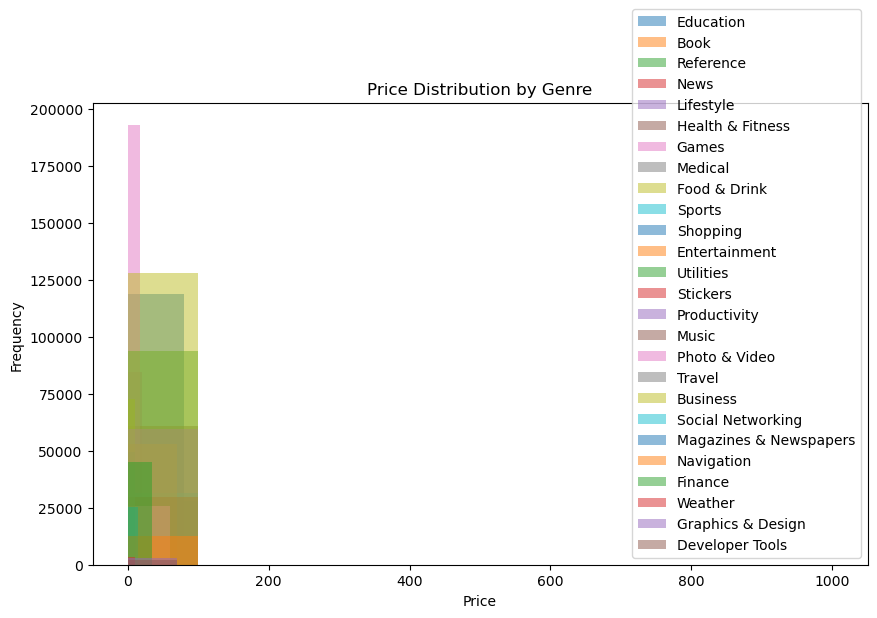

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for genre in df['Primary_Genre'].unique():
    genre_prices = df[df['Primary_Genre'] == genre]['Price']
    plt.hist(genre_prices, alpha=0.5, label=genre)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution by Genre')
plt.legend()
plt.show()

A10-The primary_Genre which attract the highest paying clients are Education, Utilities, Games, Productivity and Bussiness.

Q11. How do app releases per content rating compare year on year?

In [82]:
filtered_df = df.dropna(subset=['Release_Year', 'Content_Rating'])

In [83]:
release_counts = filtered_df.groupby(['Release_Year', 'Content_Rating'])['App_Id'].count().reset_index()

In [84]:
pivot_table = release_counts.pivot(index='Release_Year', columns='Content_Rating', values='App_Id')

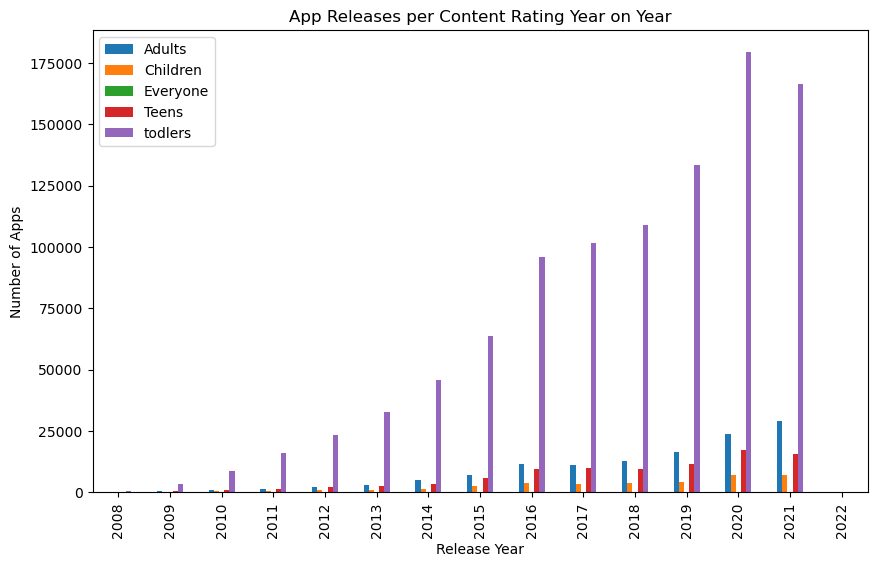

In [85]:
import matplotlib.pyplot as plt

pivot_table.plot(kind='bar',stacked=False, figsize=(10, 6))
plt.xlabel('Release Year')
plt.ylabel('Number of Apps')
plt.title('App Releases per Content Rating Year on Year')
plt.legend()

# Add values on top of each bar
# for p in plt.gca().patches:
#     plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), 
#                  fontsize=10, color='black', ha='center', va='bottom')

plt.show()

<Axes: xlabel='Release_Year'>

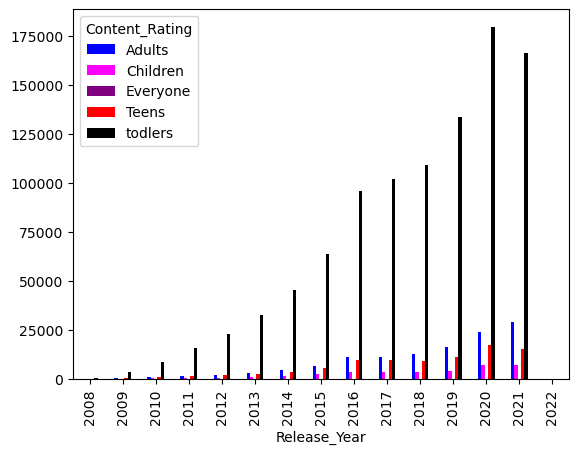

In [86]:
# Group the DataFrame by release year, content rating, and primary genre, and count the number of items in each group
cnt_YoY = df.groupby(['Release_Year', 'Content_Rating', 'Primary_Genre']).size().reset_index(name='Count')

# Group the count by release year and content rating, and sum the count for each group
# Then, unstack the DataFrame to prepare it for plotting
# Finally, create a stacked bar chart to visualize the count by release year and content rating
color_map = {'todlers': 'black', 'PG': 'blue', 'PG-13': 'yellow', 'NC-17': 'purple', 'Adults': 'blue', 'Children': 'magenta', 'Everyone': 'purple', 'Teens': 'Red'}  # Add a mapping for 'Adults'
cnt_YoY.groupby(['Release_Year', 'Content_Rating'])['Count'].sum().unstack().plot(kind='bar', stacked=False, 
                                                                                color=[color_map[i] for i in cnt_YoY['Content_Rating'].unique()])

<Axes: xlabel='Release_Year'>

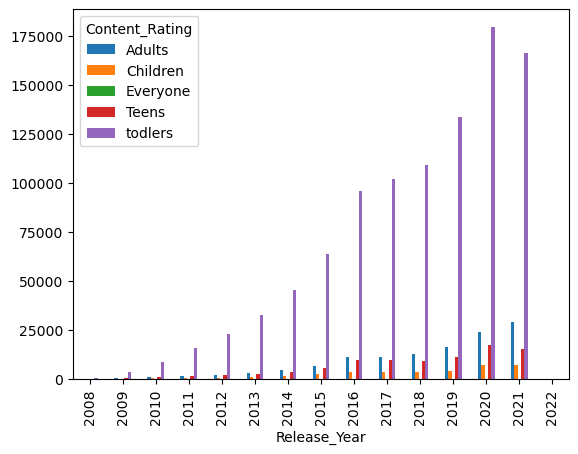

In [87]:
cnt_YoY = df.groupby(['Release_Year', 'Content_Rating', 'Primary_Genre']).size().reset_index(name='Count')
#cnt_year_app_Release.head(10).sort_values(by='Count', ascending=False)

cnt_YoY.groupby(['Release_Year', 'Content_Rating'])['Count'].sum().unstack().plot(kind='bar', stacked=False)

In [88]:
pivot_table = pivot_table.fillna(0)

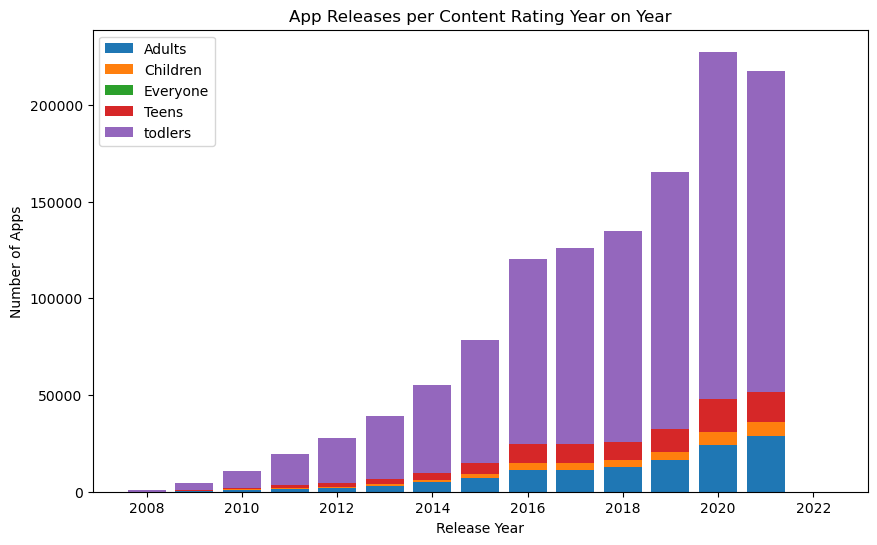

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique content ratings and release years
content_ratings = pivot_table.columns
release_years = pivot_table.index

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, rating in enumerate(content_ratings):
    ax.bar(release_years, pivot_table[rating], bottom=np.sum([pivot_table[r] for r in content_ratings[:i]], axis=0), label=rating)
    for j, (year, value) in enumerate(zip(release_years, pivot_table[rating])):
        if not np.isnan(value):  # Check if value is not NaN
            height = np.sum([pivot_table[r].iloc[j] for r in content_ratings[:i]]) + value/2
            # ax.text(year, height, str(int(value)), 
            #         fontsize=8, color='black', ha='center', va='center')

ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Apps')
ax.set_title('App Releases per Content Rating Year on Year')
ax.legend()

plt.show()

A11-Clearly todlers category taking the lead

Q12. How does user rating compare to price?

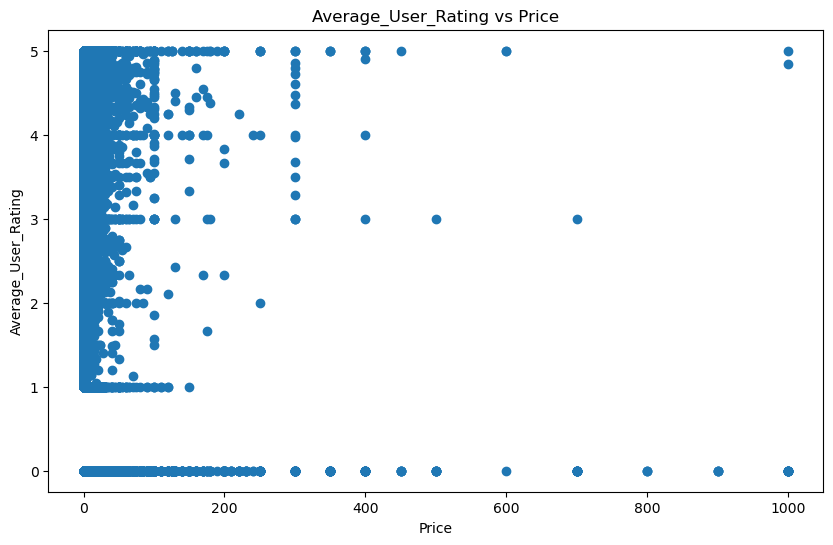

In [90]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Average_User_Rating'])
plt.xlabel('Price')
plt.ylabel('Average_User_Rating')
plt.title('Average_User_Rating vs Price')
plt.show()

In [91]:
correlation = df['Average_User_Rating'].corr(df['Price'])
print(correlation)

-0.010462048927406535


A12-The correlation coefficient between the average user rating and price is approximately -0.01. This indicates a very weak negative correlation between the two variables.

In practical terms, this means that there is no significant relationship between the average user rating and price. The correlation coefficient is very close to 0, which suggests that the two variables are largely independent of each other.

To put this into perspective, a correlation coefficient of -0.01 means that for every unit increase in price, the average user rating decreases by only 0.01 units. This is a very small effect, and it's unlikely to be noticeable in practice.

It's worth noting that correlation does not necessarily imply causation. Even if there was a strong correlation between average user rating and price, it wouldn't necessarily mean that one causes the other. There could be other factors at play that are driving the relationship.

In this case, the lack of correlation between average user rating and price suggests that users are not strongly influenced by the price of an app when leaving ratings. Other factors, such as the app's quality, features, and user experience, are likely to be more important in determining the average user rating.

Q13. How does user rating compare to MB size?

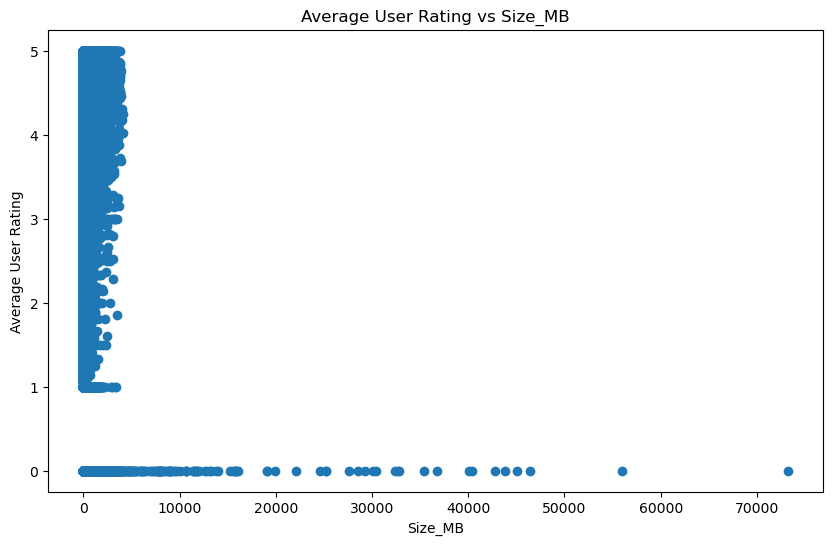

In [92]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size_MB'], df['Average_User_Rating'])
plt.xlabel('Size_MB')
plt.ylabel('Average User Rating')
plt.title('Average User Rating vs Size_MB')
plt.show()

In [93]:
correlation = df['Average_User_Rating'].corr(df['Size_MB'])
print(correlation)

0.04842389577634163


A13-The correlation coefficient between the average user rating and MB size is approximately 0.05. This indicates a very weak positive correlation between the two variables.

In practical terms, this means that there is a small but not significant relationship between the average user rating and MB size. The correlation coefficient is close to 0, which suggests that the two variables are largely independent of each other.

To put this into perspective, a correlation coefficient of 0.05 means that for every unit increase in MB size, the average user rating increases by only 0.05 units. This is a small effect, and it's unlikely to be noticeable in practice.

It's worth noting that correlation does not necessarily imply causation. Even if there was a strong correlation between average user rating and MB size, it wouldn't necessarily mean that one causes the other. There could be other factors at play that are driving the relationship.
In this case, the weak positive correlation between average user rating and MB size could suggest that users tend to rate larger apps slightly higher, possibly because they perceive them as more comprehensive or feature-rich. However, this effect is very small and may not be practically significant.

If you'd like to explore this relationship further, we could try to analyze other factors that might be influencing the average user rating, such as the app's category, number of reviews, or price. We could also try to fit a regression line to the data to model the relationship between average user rating and MB size.

Q14. How do Year on Year breakdowns per genre based on app price compare?



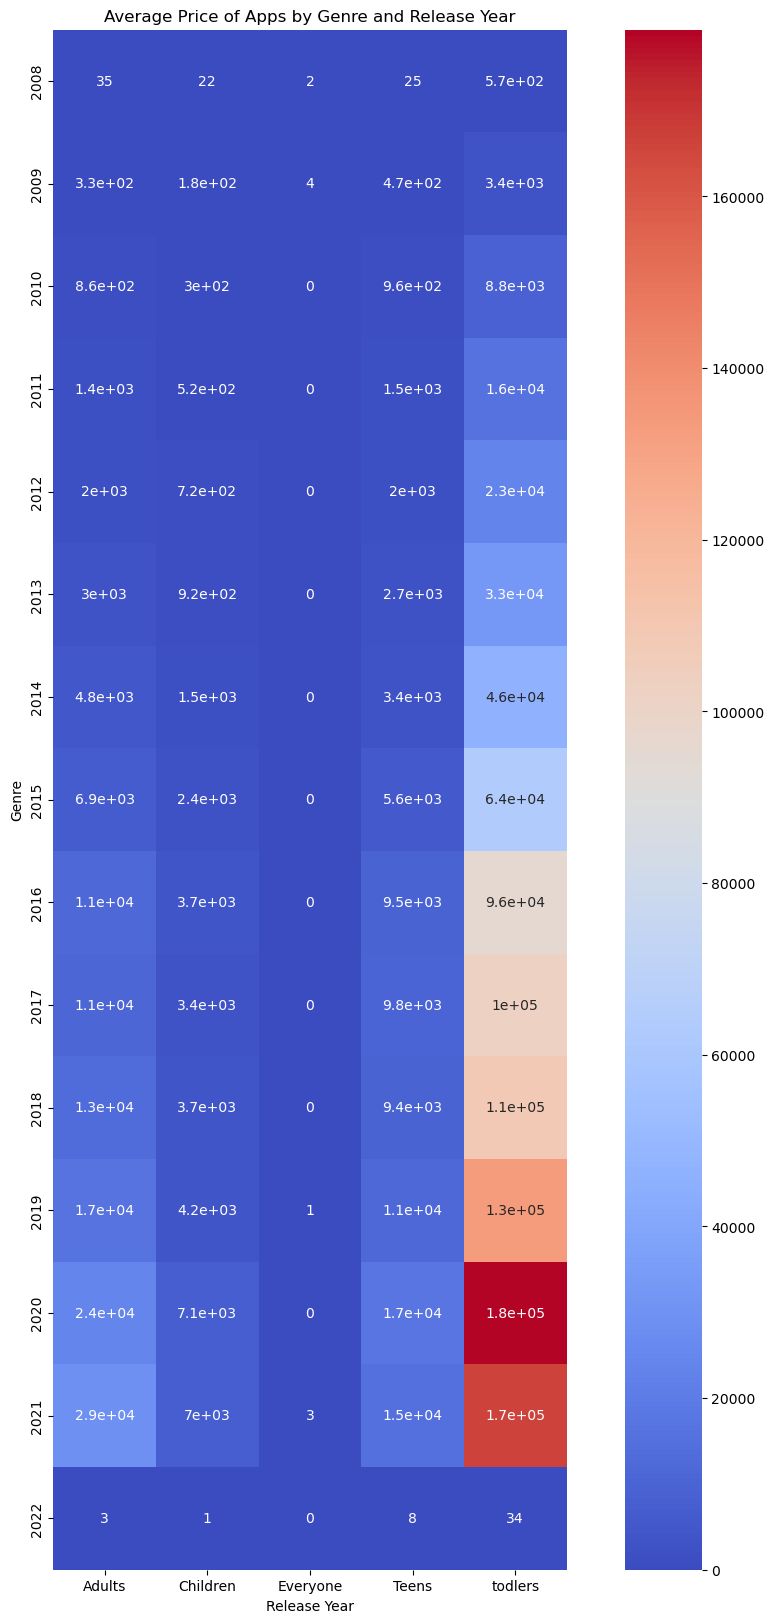

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# education_df = df[df['Primary_Genre'] == 'Education']

# education_pivot_table = education_df.pivot_table(index='Primary_Genre', columns='Release_Year', values='Price', aggfunc='mean')


# Create a pivot table to summarize the data
# pivot_table = df.pivot_table(index='Primary_Genre', columns='Release_Year', values='Price', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(15, 20))
# sns.heatmap(education_pivot_table, annot=True, cmap='coolwarm', square=True)
# plt.xlabel('Release Year')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', square=True)
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.title('Average Price of Apps by Genre and Release Year')
plt.show()

Q15. Interdependency of numeric attributes on each other?

In [95]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Type', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews', 'Size_MB',
       'Release_Year'],
      dtype='object')

In [96]:
import pandas as pd

# assuming df is your dataframe
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [97]:
corr_matrix = df[numeric_cols].corr()

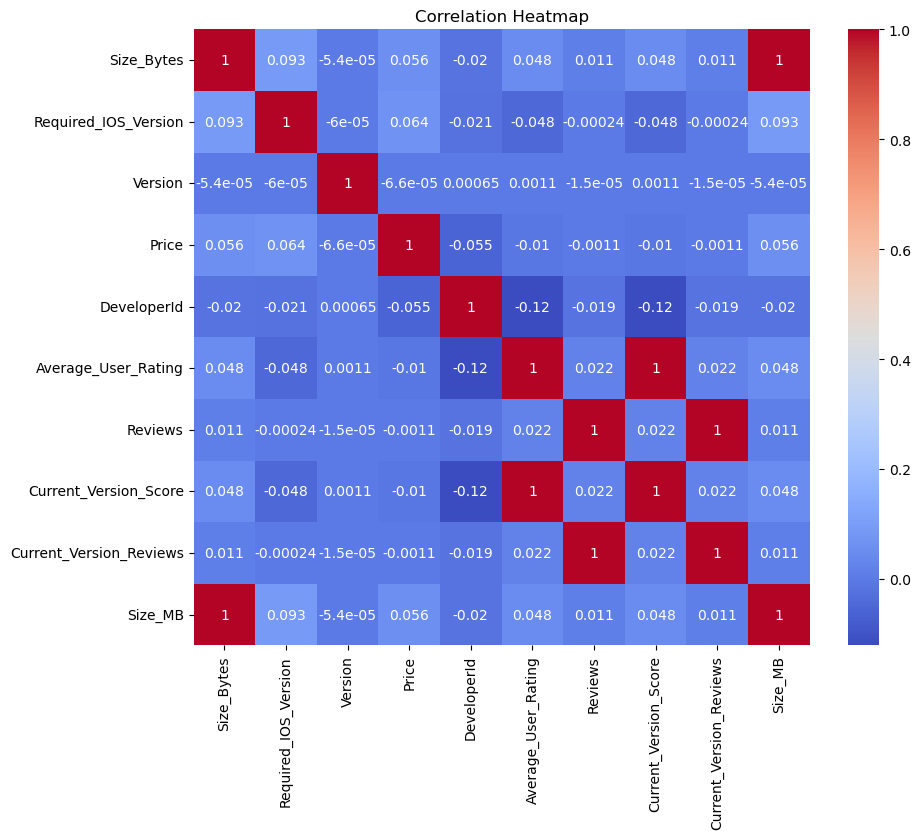

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

App Store Trends

What are the most popular genres of apps? (Primary_Genre)
Which apps have the highest average user ratings? (Average_User_Rating)
What is the distribution of app prices? (Price and Currency)
Are there any correlations between app size and user ratings? (Size_MB and Average_User_Rating)
Developer Analysis

Which developers have the most apps in the store? (Developer and DeveloperId)
What are the average user ratings for each developer? (Developer and Average_User_Rating)
Do developers with more apps tend to have higher average user ratings? (Developer and Average_User_Rating)
App Performance Over Time

How have app ratings changed over time? (Released, Updated, and Average_User_Rating)
Are there any seasonal patterns in app updates or releases? (Released and Updated)
How do app ratings change with each new version release? (Version and Average_User_Rating)
App Store Competition

Which genres have the most competition? (Primary_Genre and App_Id)
Are there any correlations between app size and the number of reviews? (Size_MB and Reviews)
Which apps have the most reviews? (Reviews)
Other Questions

What is the distribution of app sizes? (Size_MB)
Are there any correlations between app price and size? (Price and Size_MB)
How do app ratings vary by content rating? (Content_Rating and Average_User_Rating)

Q16- What are the most popular genres of apps? 

In [99]:
import pandas as pd

# Assuming your dataframe is named 'df'

# Count the number of apps in each genre
genre_counts = df['Primary_Genre'].value_counts()

# Print the top 10 most popular genres
print(genre_counts.head(10))

Primary_Genre
Games               193423
Business            128203
Education           119114
Utilities            93937
Lifestyle            84493
Food & Drink         72815
Health & Fitness     60682
Productivity         59389
Entertainment        53074
Shopping             49493
Name: count, dtype: int64


A16- The most popular genre of apps is 'Games' followed by 'Business' and 'Education'.

Q17-Which apps have the highest average user ratings?

In [100]:
import pandas as pd

# Assuming your dataframe is named 'df'

# Sort the dataframe by average user rating in descending order
top_rated_apps = df.sort_values(by='Average_User_Rating', ascending=False)

# Print the top 10 apps with the highest average user ratings
print(top_rated_apps.head(10)[['Primary_Genre', 'App_Name', 'Average_User_Rating']])

       Primary_Genre                     App_Name  Average_User_Rating
399120     Education                   MoodleMoot                  5.0
589671  Food & Drink               Big E Pizza CA                  5.0
589702  Food & Drink       Big John's Pizza Queen                  5.0
132030  Food & Drink    Las delicias de la Abuela                  5.0
589698  Food & Drink           Big Joe's Pizza NJ                  5.0
906376     Lifestyle            Miu's Tea Rewards                  5.0
589692  Food & Drink           Big Herm's Kitchen                  5.0
589690  Food & Drink               Big Guys Pizza                  5.0
906382     Lifestyle                        MIVOC                  5.0
589681  Food & Drink  Big Fish Little Fish Online                  5.0


A17-Education app 'MoodleMoot' has the highest average user rating followed by 'Big E Pizza CA' and 'Big John's Pizza Queen' of Food & Drink category.

Q18-What is the distribution of app prices?

In [101]:
# Calculate summary statistics
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_dev_price = df['Price'].std()

print(f'Mean Price: {mean_price}')
print(f'Median Price: {median_price}')
print(f'Standard Deviation of Price: {std_dev_price}')

Mean Price: 0.5045459940488045
Median Price: 0.0
Standard Deviation of Price: 6.872006134183212


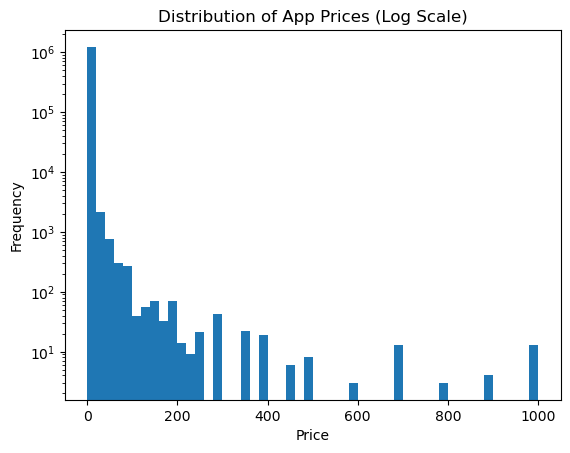

In [102]:
import matplotlib.pyplot as plt

# Plot a histogram of app prices on a log scale
plt.hist(df['Price'], bins=50, log=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of App Prices (Log Scale)')
plt.show()

In [103]:
# Sort the dataframe by price in descending order
most_expensive_apps = df.sort_values(by='Price', ascending=False)

# Print the top 10 most expensive apps
print(most_expensive_apps.head(10)[['Primary_Genre', 'App_Name', 'Price']])

            Primary_Genre                       App_Name   Price
1022813         Utilities                     YCS Sketch  999.99
1110773      Productivity                     Tower Gage  999.99
935957              Music                     CyberTuner  999.99
707359             Sports                   VERT Stealth  999.99
1020170            Sports              Shot Tracer Event  999.99
707360   Health & Fitness               VERT Team System  999.99
168219           Business  Entertastic white label admin  999.99
482114           Business            ASPL POS (Odoo V14)  999.99
444122              Music                       RP.MEDIA  999.99
1086244         Utilities         Shale Shaker Vibration  999.99


A18-It looks like we have a highly skewed distribution of app prices. The mean price is around $0.50, but the median price is $0.00, which suggests that most apps are free. The standard deviation of price is quite high, which indicates that there is a lot of variability in the prices of apps.

The fact that the median price is $0.00 and the mean price is $0.50 suggests that there are some very expensive apps that are pulling the mean price up. This is consistent with the idea that many apps are free, but some premium apps are quite expensive.

Q19-Are there any correlations between app size and user ratings?